In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('./titanic.csv')

In [16]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


завдання 1

In [11]:
survived_percentage = dataset.groupby('Sex')['Survived'].mean() * 100

print(f'Чоловіки вижили: {survived_percentage["male"]:.0f}%')
print(f'Жінки вижили: {survived_percentage["female"]:.0f}%')

Чоловіки вижили: 19%
Жінки вижили: 74%


завдання 2

<ipython-input-100-799693e2628b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=dataset, ax=ax, palette=['yellow', 'grey'])
<ipython-input-100-799693e2628b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=dataset, ax=ax, palette=['pink', 'lightblue'], order=['female', 'male'])


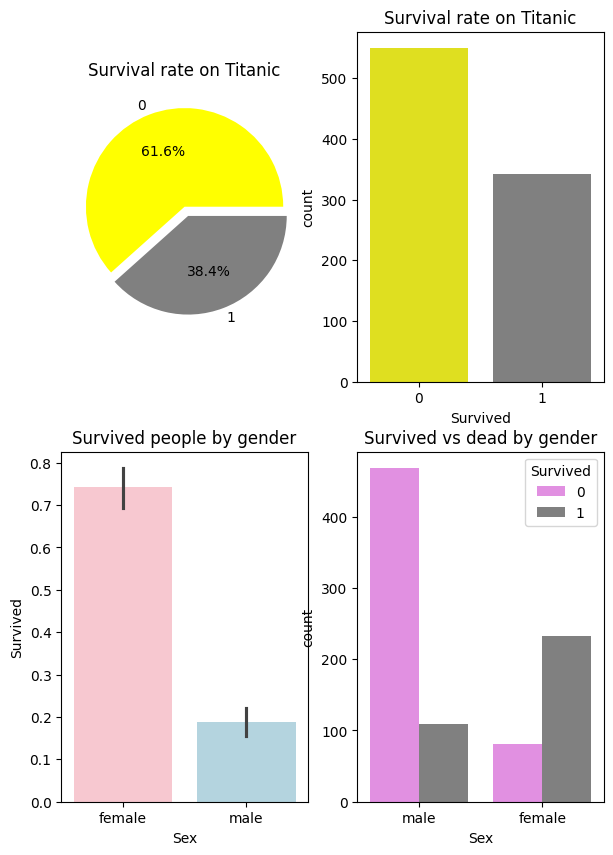

In [100]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

colors = ['yellow', 'grey']

ax = axes[0, 0]
dataset['Survived'].value_counts().plot(kind='pie', explode=[0, 0.1], colors = colors, ax=ax, autopct='%0.1f%%')
ax.set_title('Survival rate on Titanic')
ax.set_ylabel('')

ax = axes[0, 1]
sns.countplot(x='Survived', data=dataset, ax=ax, palette=['yellow', 'grey'])
ax.set_title('Survival rate on Titanic')

ax = axes[1, 0]
sns.barplot(x='Sex', y='Survived', data=dataset, ax=ax, palette=['pink', 'lightblue'], order=['female', 'male'])
ax.set_title('Survived people by gender')

ax = axes[1, 1]
sns.countplot(x='Sex', hue='Survived', data=dataset, ax=ax, palette=['violet', 'grey'])
ax.set_title('Survived vs dead by gender')

plt.show()


За допомогою цих графіків ми бачимо що більшість людей на Титаніку загинуло, але все ж серед виживших переважають жінки, а більшість чоловіків померло

Завдання 3

In [86]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Завдання 4

In [96]:
females = dataset.loc[dataset["Sex"] == "female"]

names = females["Name"].str.split(",", expand=True)[1].str.split(".", expand=True)[1].value_counts()
fem_name = names.index[0]

print("Найпопулярніше жіноче ім'я:", fem_name)


Найпопулярніше жіноче ім'я:  Mary


Завдання 5

In [98]:
males = dataset.loc[dataset["Sex"] == "male"]

name = males["Name"].str.split(",", expand=True)[1].str.split(".", expand=True)[1].value_counts()
male_name = name.index[0]

print("Найпопулярніше чоловіче ім'я:", male_name)


Найпопулярніше чоловіче ім'я:  John


завдання 6

<ipython-input-114-61a4eee3e63b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=dataset, ax=ax[1], palette=colors, order=[1, 2, 3])


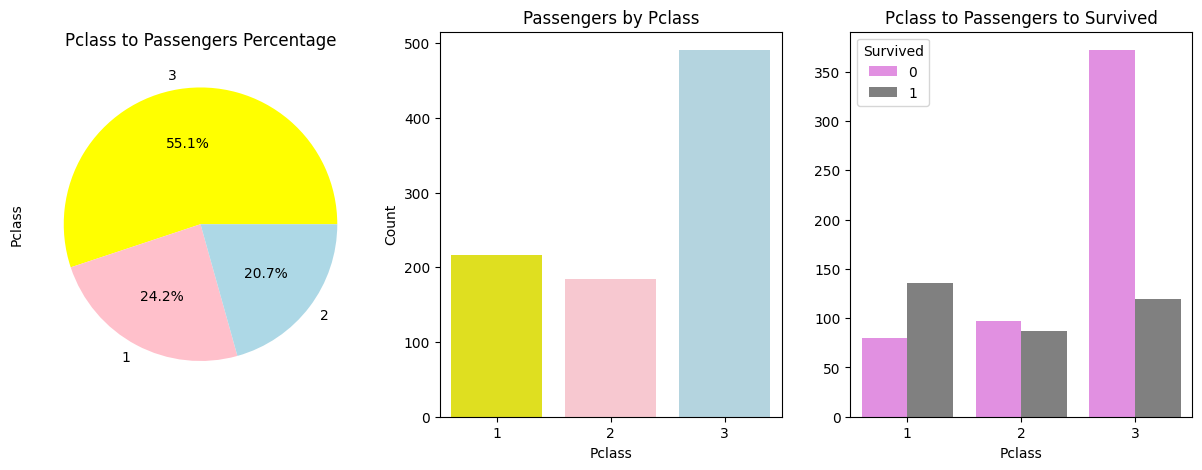

In [114]:
f, ax = plt.subplots(1, 3, figsize=(15, 5))

colors = ['yellow', 'pink', 'lightblue']
dataset['Pclass'].value_counts().plot.pie(autopct='%0.1f%%', ax=ax[0], colors=colors)
ax[0].set_title('Pclass to Passengers Percentage')

sns.countplot(x='Pclass', data=dataset, ax=ax[1], palette=colors, order=[1, 2, 3])
ax[1].set_title('Passengers by Pclass')
ax[1].set_ylabel('Count')

sns.countplot(x='Pclass', hue='Survived', data=dataset, ax=ax[2], palette=['violet', 'grey'])
ax[2].set_title('Pclass to Passengers to Survived')
ax[2].set_ylabel('')

plt.show()

На цих діаграмах зоображено кількість загиблих та виживших пасажирів у кожному класі. ми можемо побачити що найбільше загиблих саме в третьому класі

Завдання 7

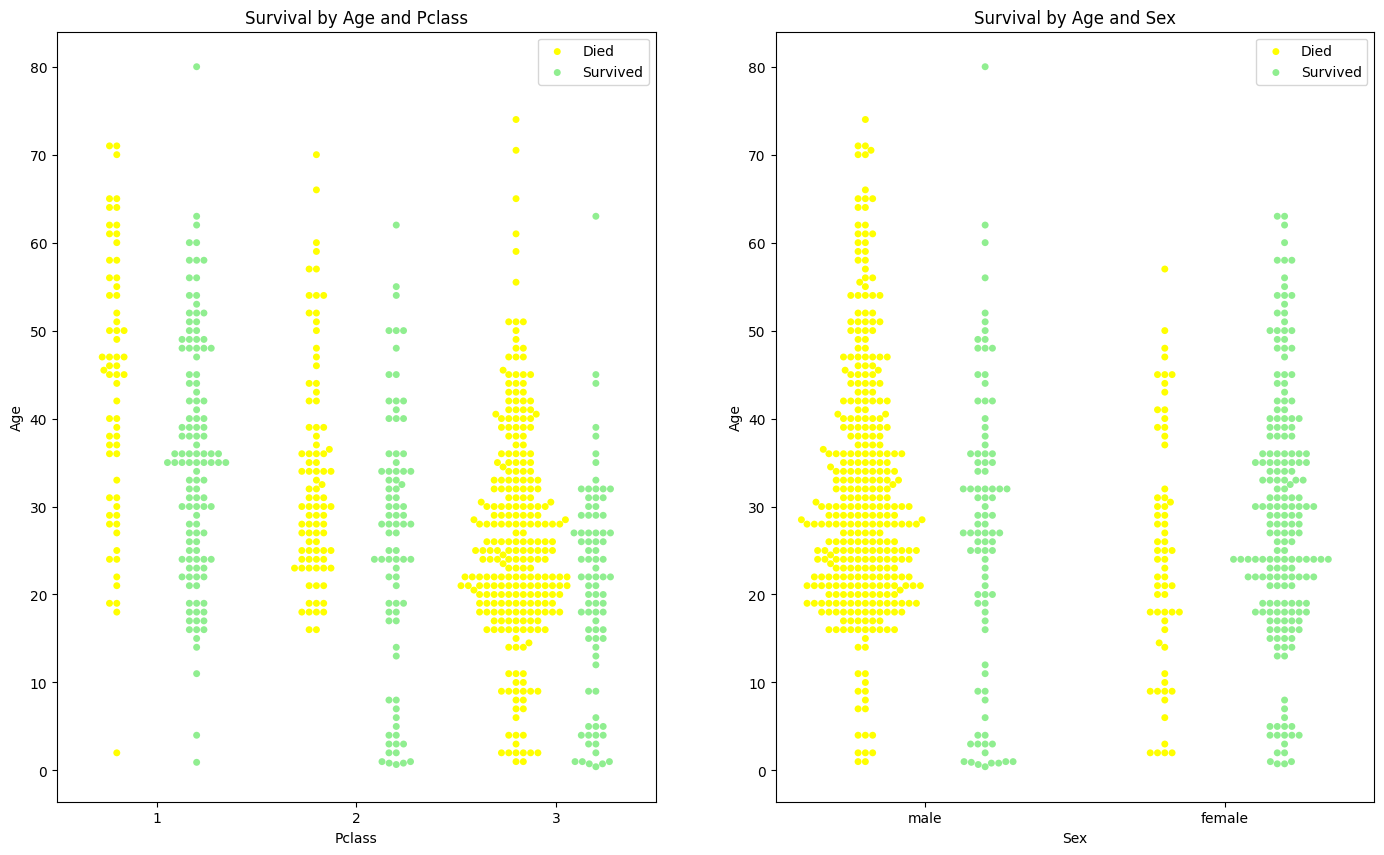

In [127]:
f, ax = plt.subplots(1, 2, figsize=(17, 10))

sns.swarmplot(x='Pclass', y='Age', hue='Survived', dodge=True, data=dataset, size=5, ax=ax[0], palette=['yellow', 'lightgreen'])
ax[0].set_title('Survival by Age and Pclass')
ax[0].set_xlabel('Pclass')
ax[0].set_ylabel('Age')
ax[0].legend(['Died', 'Survived'])

sns.swarmplot(x='Sex', y='Age', hue='Survived', dodge=True, data=dataset, size=5, ax=ax[1], palette=['yellow', 'lightgreen'])
ax[1].set_title('Survival by Age and Sex')
ax[1].set_xlabel('Sex')
ax[1].set_ylabel('Age')
ax[1].legend(['Died', 'Survived'])

plt.show()

перший графік показує кількість виживших та загиблих в залежності від класу та віку, можемо побачити що загинуло багато молодих людей в третьому клаасі. Другтий графік показує співвідношення ймовірності вижити в залежності від віку та статті, найбільше загинуло молодих чоловіків

Завдання 8

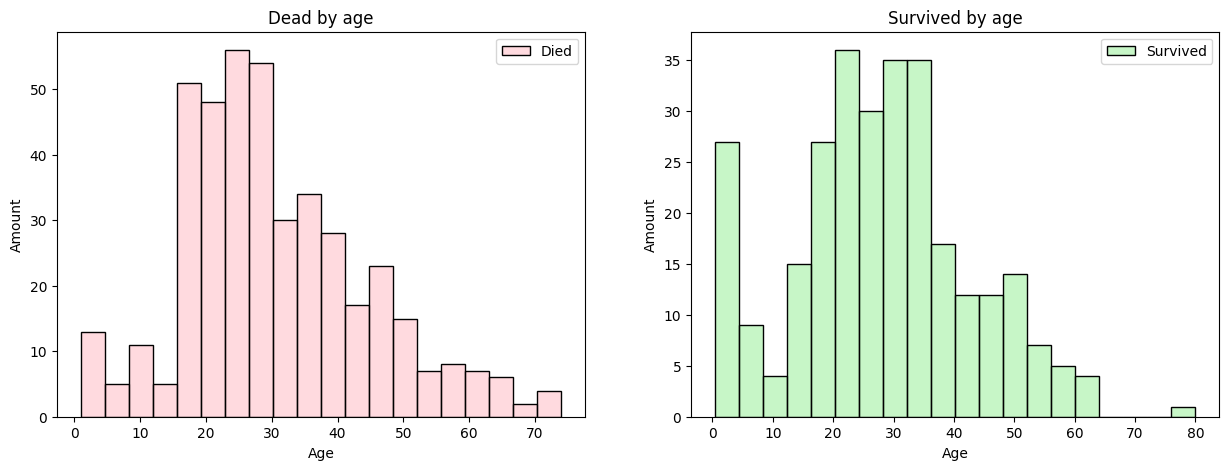

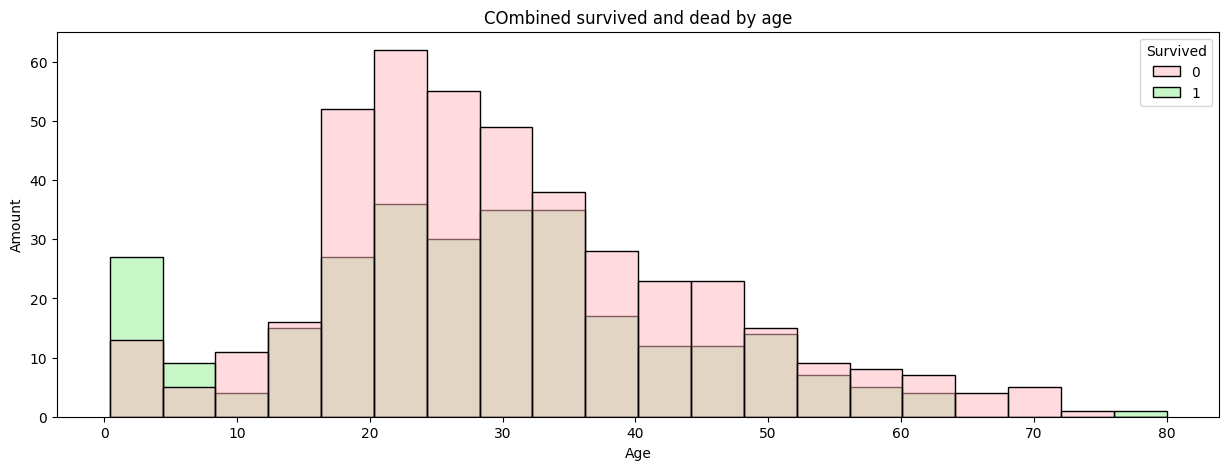

In [131]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=dataset[dataset['Survived'] == 0], x='Age', bins=20, kde=False, color='lightpink', edgecolor='black', label='Died', alpha=0.5, ax=axes[0])
axes[0].set_title('Dead by age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Amount')
axes[0].legend()

sns.histplot(data=dataset[dataset['Survived'] == 1], x='Age', bins=20, kde=False, color='lightgreen', edgecolor='black', label='Survived', alpha=0.5, ax=axes[1])
axes[1].set_title('Survived by age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Amount')
axes[1].legend()

plt.show()

plt.figure(figsize=(15, 5))
sns.histplot(data=dataset, x='Age', bins=20, kde=False, hue='Survived', palette={0: 'lightpink', 1: 'lightgreen'}, edgecolor='black', alpha=0.5)
plt.title('COmbined survived and dead by age')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.show()

Тут можна побачити вік пасажирів що загинули та вижили, Найбільше загиблих припадає на вік від 18 до 30

Завдання 9

<ipython-input-134-a754604e65df>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=dataset, ax=axes[0, 0], palette=['yellow', 'lightgreen', 'lightblue'])


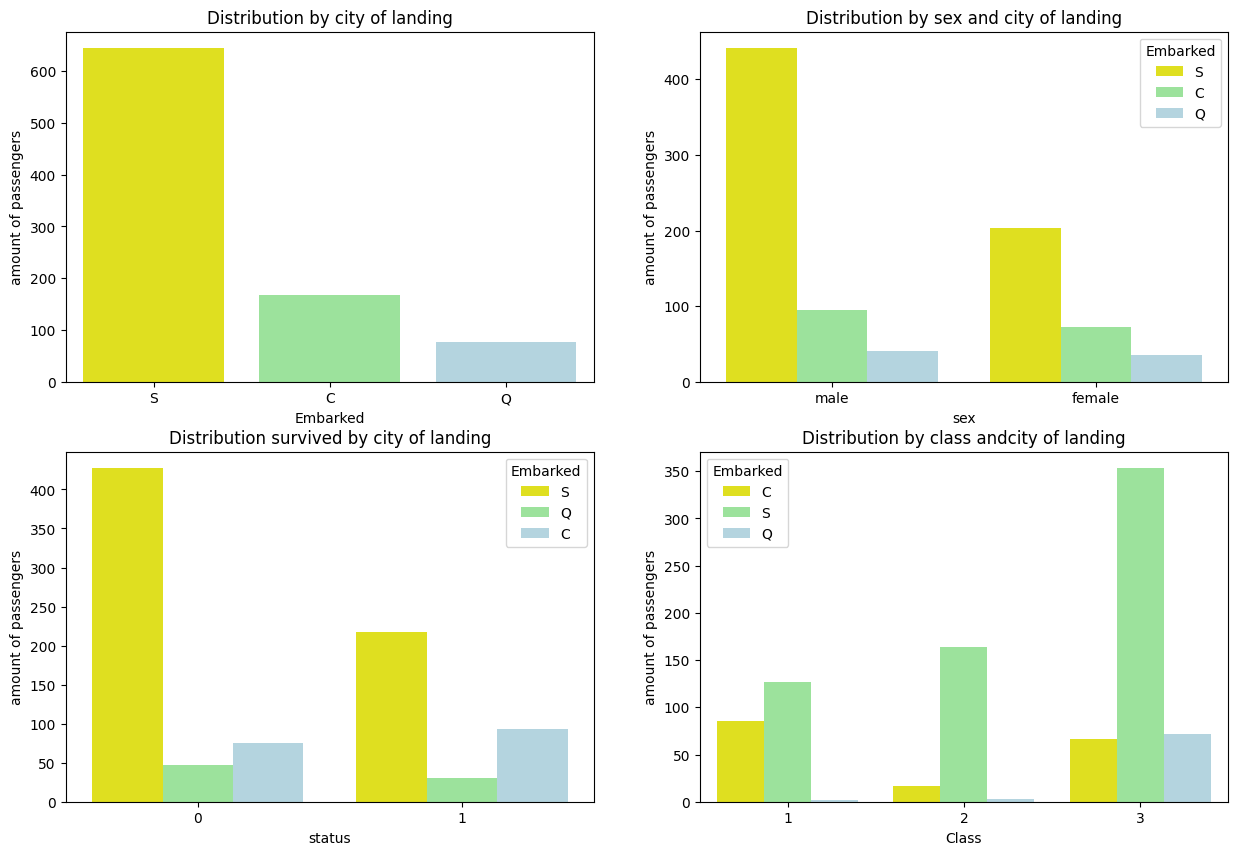

In [134]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(x='Embarked', data=dataset, ax=axes[0, 0], palette=['yellow', 'lightgreen', 'lightblue'])
axes[0, 0].set_title('Distribution by city of landing')
axes[0, 0].set_xlabel('Embarked')
axes[0, 0].set_ylabel('amount of passengers')

sns.countplot(x='Sex', hue='Embarked', data=dataset, ax=axes[0, 1], palette=['yellow', 'lightgreen', 'lightblue'])
axes[0, 1].set_title('Distribution by sex and city of landing')
axes[0, 1].set_xlabel('sex')
axes[0, 1].set_ylabel('amount of passengers')

sns.countplot(x='Survived', hue='Embarked', data=dataset, ax=axes[1, 0], palette=['yellow', 'lightgreen', 'lightblue'])
axes[1, 0].set_title('Distribution survived by city of landing')
axes[1, 0].set_xlabel('status')
axes[1, 0].set_ylabel('amount of passengers')

sns.countplot(x='Pclass', hue='Embarked', data=dataset, ax=axes[1, 1], palette=['yellow', 'lightgreen', 'lightblue'])
axes[1, 1].set_title('Distribution by class andcity of landing')
axes[1, 1].set_xlabel('Class')
axes[1, 1].set_ylabel('amount of passengers')

plt.show()

Ми бачимо що більшість людей сіло на борт у порті Саунтгемптон, і більшість з них були чоловіки